**Цель проекта:**

Цель проекта состоит в создании веб-приложения, которое предсказывает качество вина на основе доступных данных. Это позволит пользователям оценить и сравнить качество вина на основе его характеристик, что может быть полезно для профессионалов виноделия, сомелье, продавцов и любителей вина.

Основные задачи проекта включают:

1. Сбор и подготовка данных: Июзучение и сбор доступных данных о различных характеристиках вин (например, уровень кислотности, содержание сахара, pH и т.д.) и их соответствующих оценок качества. Подготовка данных путем очистки, преобразования и структурирования для дальнейшего анализа и моделирования.

2. Анализ данных: Исследование данных с целью выявления взаимосвязей и паттернов между характеристиками вин и их оценками качества. Это может включать визуализацию данных, статистический анализ и поиск ключевых факторов, влияющих на качество вина.

3. Моделирование: Разработка и обучение модели машинного обучения, которая будет предсказывать качество вина на основе его характеристик. Это может включать выбор и настройку соответствующих алгоритмов машинного обучения, разделение данных на обучающую и тестовую выборки, оценку производительности модели и выбор оптимальной модели.

4. Разработка веб-приложения: Создание пользовательского интерфейса для веб-приложения, который позволит пользователям вводить характеристики вина и получать предсказания о его качестве. Веб-приложение должно быть интуитивно понятным, отзывчивым и эстетически привлекательным.

5. Тестирование и оптимизация: Проверка функциональности и производительности веб-приложения. Тестирование приложения на различных сценариях использования и устранение возможных ошибок. Оптимизация приложения с целью обеспечения быстрой и надежной работы.

6. Развертывание веб-приложения на сервере или в облаке, чтобы оно стало доступным для пользователей.

Общая цель проекта состоит в создании полезного инструмента для предсказания качества вина на основе его характеристик и предоставления пользователям удобного интерфейса для использования этой информации.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats

In [2]:
warnings.filterwarnings('ignore')

#Сбор и подготовка данных

Датасет Wine Quality (Качество вина) представляет собой набор данных, который содержит информацию о химических характеристиках вина и соответствующих оценках его качества. Этот датасет широко используется в задачах анализа и предсказания качества вина с помощью методов машинного обучения.

Описание колонок (характеристик) в датасете Wine Quality:

1. Type - тип вина (красное, белое)
2. Fixed acidity (Фиксированная кислотность): содержание фиксированной кислоты в вине (г/л). Фиксированная кислотность обусловлена наличием неизбежных кислот в вине. Например, винная кислота, лимонная кислота или яблочная кислота. Этот тип кислоты обеспечивает баланс вкуса вина и придает свежесть вкусу.
3. Volatile acidity (Летучая кислотность): содержание летучей кислоты в вине (г/л). Летучая кислотность представляет собой часть кислоты в вине, которую можно почувствовать запахом. В отличие от кислот, ощутимых на вкус (о которых мы говорили выше), летучая кислотность, или, другими словами, закисление вина, является одним из наиболее распространенных дефектов.
4. Citric acid (Лимонная кислота): содержание лимонной кислоты в вине (г/л). Допускается использование в виноделии в соответствии с резолюцией Международной организации виноделия и виноградарства No. 23/2000. Она может использоваться в трех случаях: для обработки вина кислотой (увеличение кислотности), для сбора винограда, для очистки фильтров от возможных грибковых и плесневых инфекций.
5. Residual sugar (Остаточный сахар): содержание остаточного сахара в вине (г/л). Остаточный сахар - это виноградный сахар, который не был переведен в алкоголь при брожении.
6. Chlorides (Хлориды): содержание хлоридов в вине (г/л). Структура вина также зависит от содержания минералов, определяющих такие вкусовые ощущения, как соленость (сапидность). В вине присутствуют анионы неорганических кислот (хлориды, сульфаты, сульфиты...), анионы передвижных кислот, катионы металлов (калий, натрий, магний...). Их содержание зависит в основном от климатической зоны (холодный или теплый регион, солончаковые почвы в зависимости от близости моря), винодельческих практик, хранения и выдержки вина.
7. Free sulfur dioxide (Свободный диоксид серы): содержание свободного диоксида серы в вине (мг/л). Диоксид серы (сернистый оксид, диоксид серы, растворимость E220, SO2) используется как консервант благодаря своим антиоксидантным и антимикробным свойствам. Молекулярный SO2 является чрезвычайно важным антибиотиком, влияющим на значительное потребление (включая дикую дрожжь), что может проявиться в порче вина.
8. Total sulfur dioxide (Общий диоксид серы): содержание общего диоксида серы в вине (мг/л).
9. Density (Плотность): плотность вина (г/см³). Плотность вина может быть как меньше, так и больше плотности воды. Ее значение определяется прежде всего концентрацией алкоголя и сахара. Белые, розовые и красные вина обычно легкие - их плотность при 20°C ниже 998,3 кг/м3.
10. pH: уровень pH вина (0-14). pH - это мера кислотности вина. Все вина идеально имеют уровень pH от 2,9 до 4,2. Чем ниже pH, тем более кислое вино; чем выше pH, тем менее кислое вино.
11. Sulphates (Сульфаты): содержание сульфатов в вине (г/л). Сульфаты - это естественный результат брожения дрожжей сахара в вине в алкоголь. То есть наличие сульфитов в вине исключено.
12. Alcohol (Алкоголь): содержание алкоголя в вине (% по объему). Содержание алкоголя в винах зависит от многих факторов: сорта винограда и количества сахара в ягодах, технологии производства и условий выращивания. Вина сильно различаются по степени: этот параметр варьирует в диапазоне от 4,5 до 22 в зависимости от категории.
13. Quality (Качество): оценка качества вина, оцененная экспертами по шкале от 0 до 10 (целевая переменная).


In [ ]:
df = pd.read_csv('winequalityN.csv')

In [ ]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# статистическая информация
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
#преобразование категориальных переменных
df['type'] = df['type'].replace({'white':1, 'red':0})

In [ ]:
# информация о типе данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [ ]:
# проверка на наличие пустых значений
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Заполняем пропущенные значения

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imputer=KNNImputer(n_neighbors=5, weights='uniform')

In [ ]:
imputer.fit(df)

KNNImputer()

In [ ]:
wine_transform = imputer.transform(df)

In [ ]:
wine = pd.DataFrame(wine_transform,columns = df.columns)

In [ ]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,1.0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,1.0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [ ]:
# проверка на наличие пустых значений
wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# сохраняем данные после обработки
wine.to_csv('winequality_correct.csv',index=False)

#Анализ данных

In [ ]:
winequality = pd.read_csv('winequality_correct.csv')

In [ ]:
winequality.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,1.0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,1.0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


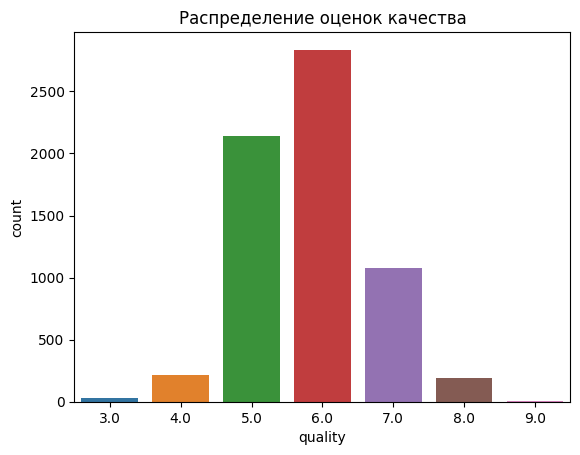

In [ ]:
# Исследование распределения оценок качества
sns.countplot(x=winequality['quality'])
plt.title('Распределение оценок качества')
plt.show()

Большинство образцов вина имеют оценку качества в диапазоне от 5 до 7

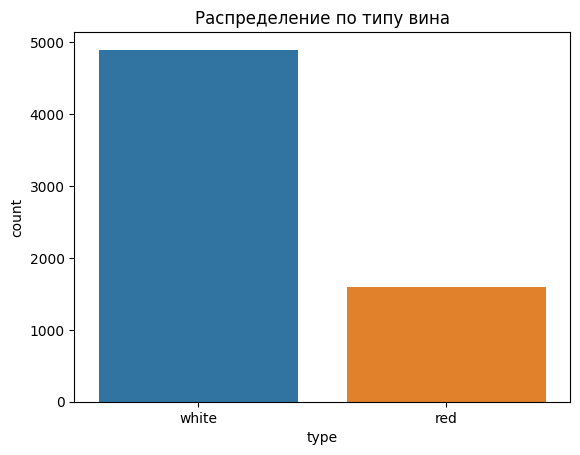

In [ ]:
sns.countplot(x=winequality['type'].replace({0:'red', 1:'white'}))
plt.title('Распределение по типу вина')
plt.show()

В данном датасете наблюдаем дисбаланс классов красного и белого вина, это нужно будет учитывать при построении модели машинного обучения

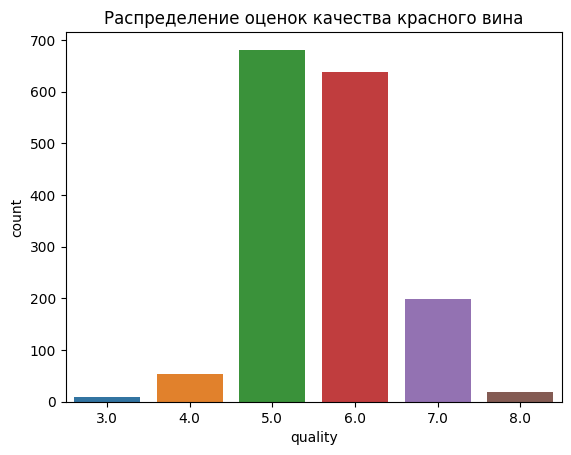

In [ ]:
sns.countplot(x=(winequality.loc[winequality['type'] == 0]).quality)
plt.title('Распределение оценок качества красного вина')
plt.show()

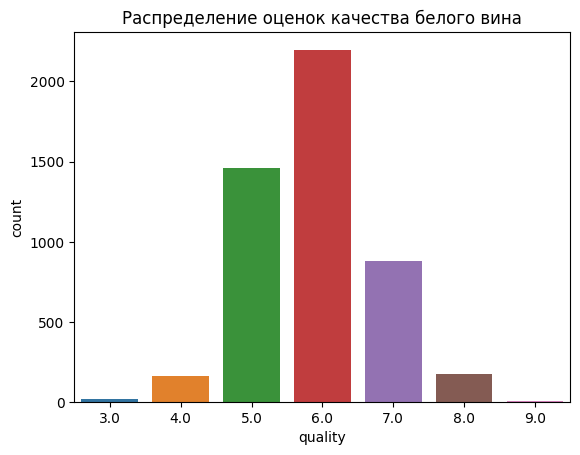

In [ ]:
sns.countplot(x=(winequality.loc[winequality['type'] == 1]).quality)
plt.title('Распределение оценок качества белого вина')
plt.show()

In [ ]:
print(f"Средняя оценка белого вина {(winequality.loc[winequality['type'] == 1]).quality.mean()}")

Средняя оценка белого вина 5.87790935075541


In [ ]:
print(f"Средняя оценка красного вина {(winequality.loc[winequality['type'] == 0]).quality.mean()}")

Средняя оценка красного вина 5.6360225140712945


По распределению оценок по типу вина, видно что белому вину чаще ставят более высокие оценки

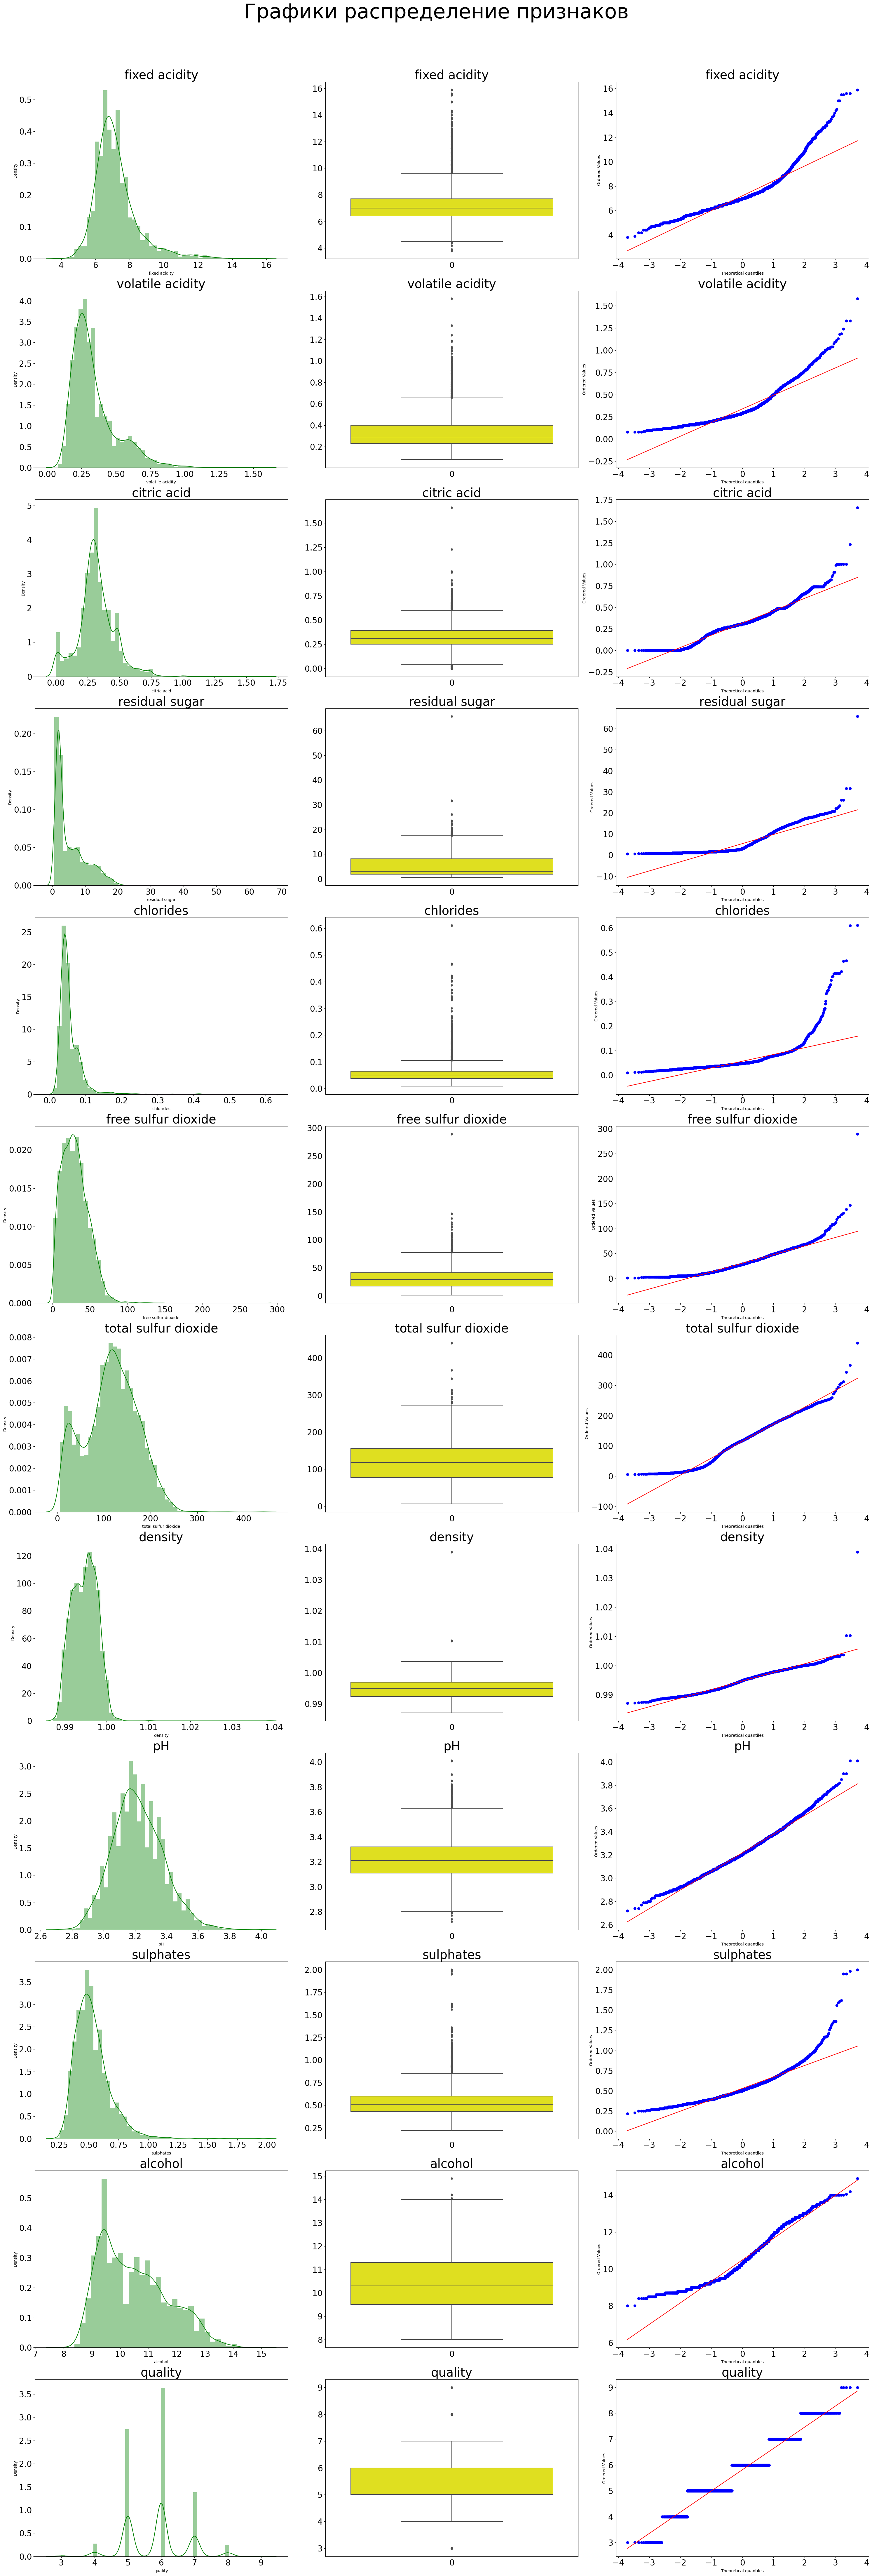

In [ ]:
# построим график отображения признаков
fig, ax = plt.subplots(12, 3, figsize=(30, 90))

for index, i in enumerate((winequality.drop('type', axis=1, inplace=False)).columns):
    sns.distplot(winequality[i], ax=ax[index, 0], color='green')
    sns.boxplot(winequality[i], ax=ax[index, 1], color='yellow')
    stats.probplot(winequality[i], plot=ax[index, 2])

    ax[index, 0].tick_params(axis='both', labelsize=20)
    ax[index, 1].tick_params(axis='both', labelsize=20)
    ax[index, 2].tick_params(axis='both', labelsize=20)

    ax[index, 0].set_title(i, fontsize=30)
    ax[index, 1].set_title(i, fontsize=30)
    ax[index, 2].set_title(i, fontsize=30)

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle('Графики распределение признаков', fontsize=50)

plt.show()

У большенства признаков распределение близкое к нормальному, так же имеются выбросы которые позднее нужно будет обработать перед обучением модели

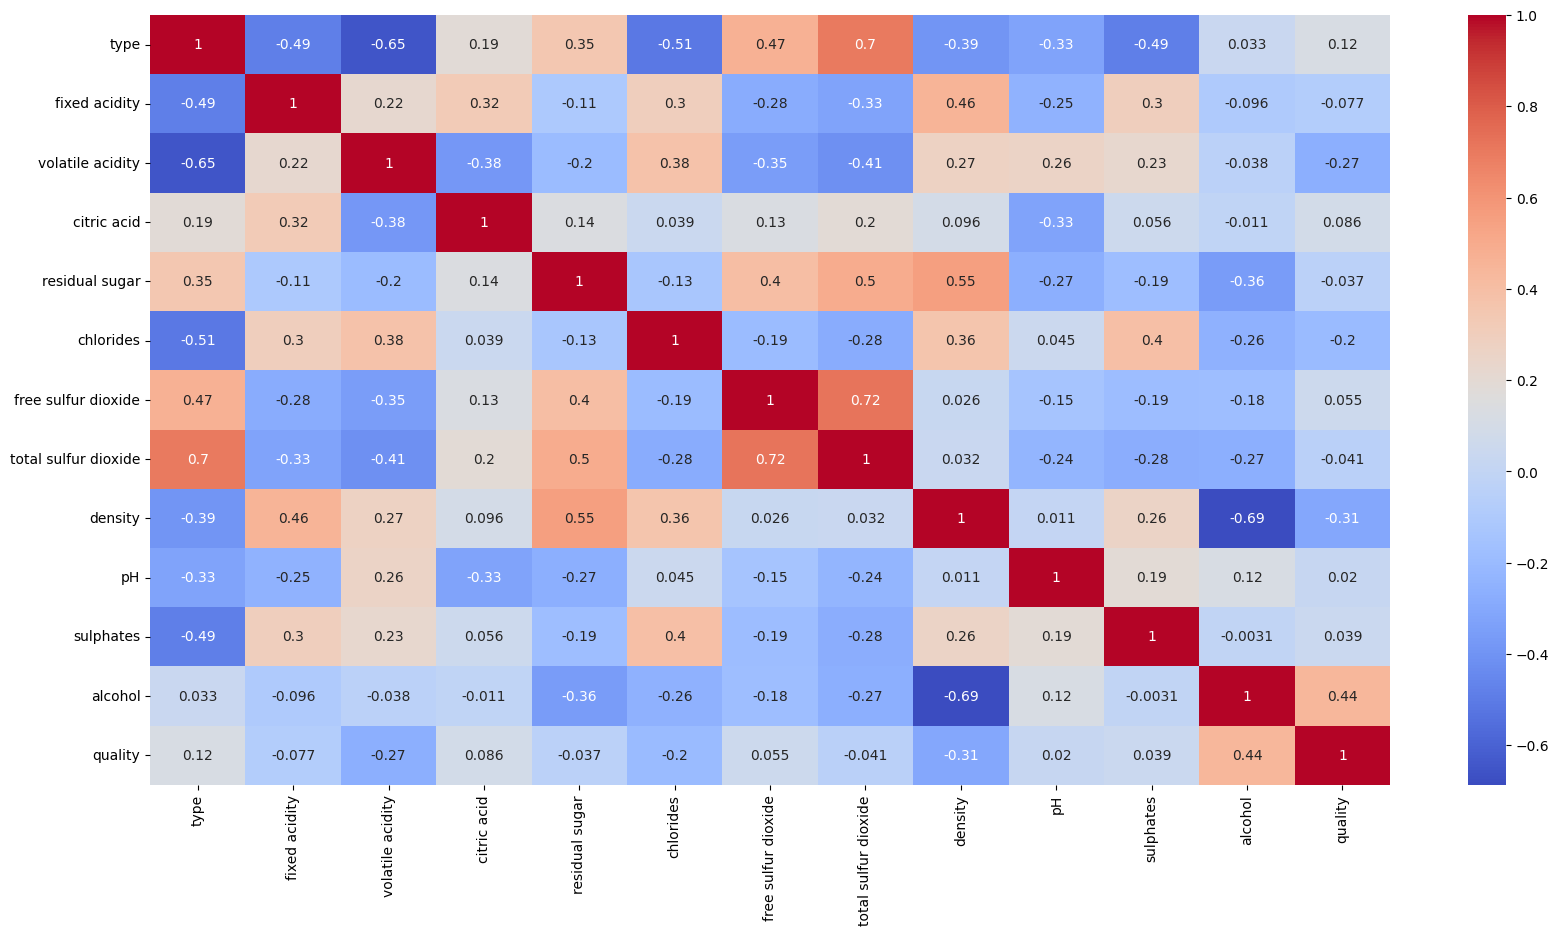

In [ ]:
# построим матрицу корреляции для определения зависимости признаков
corr = winequality.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Наибольшее значение корреляции с целевой переменной у признака 'alcogol', данный признак будет являться основным для определения качества вина, так же присутствует не очень сильная отрицательная корреляция с признаком 'density'(плотность)

# Подготовка данных для обучения модели

In [ ]:
# удаляем выбросы
for col in winequality.columns:
  up = (winequality[col].quantile(0.75)-winequality[col].quantile(0.25)) * 1.5 + winequality[col].quantile(0.75)
  low = winequality[col].quantile(0.25)- (winequality[col].quantile(0.75)-winequality[col].quantile(0.25)) * 1.5
  data = winequality[(winequality[col]<up)&(winequality[col]>low)]
print(f'Длина датасета после удаления выбросов {len(data)}, удалено {round(100-len(data)/len(winequality)*100, 2)} % данных')

Длина датасета после удаления выбросов 6269, удалено 3.51 % данных


Устраним дисбаланс классов красного и белого вина

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42, k_neighbors= 5)

In [ ]:
X_type, y_type = data.drop('type', axis = 1), data['type']

In [ ]:
X_smout, y_smout = sm.fit_resample(X_type, y_type)

In [ ]:
Counter(y_smout)

Counter({1.0: 4698, 0.0: 4698})

In [ ]:
winequality_for_ML = pd.concat([X_smout, y_smout], axis= 1)

In [ ]:
winequality_for_ML.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,1.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,1.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,1.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,1.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,1.0


Сохраним готовый датасет для обучения модели

In [ ]:
winequality_for_ML.to_csv('winequality_for_ML.csv',index=False)

#Выбор модели и обучение

In [4]:
df = pd.read_csv('winequality_for_ML.csv')

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,1.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,1.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,1.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,1.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,1.0


**PyCaret** - это библиотека машинного обучения на языке Python, которая предоставляет простой и удобный интерфейс для автоматизации и ускорения процесса разработки моделей машинного обучения. Она обладает множеством функций, предназначенных для выполнения различных задач в рамках процесса разработки моделей, включая предобработку данных, выбор моделей, настройку гиперпараметров, оценку моделей и развертывание моделей.

Вот основные особенности и возможности библиотеки PyCaret:

1. Упрощенный рабочий процесс: PyCaret предлагает упрощенный рабочий процесс, который позволяет разработчикам быстро перейти от идеи к моделированию, минимизируя необходимость вручную выполнять множество шагов, таких как предобработка данных, кодирование категориальных переменных, масштабирование данных и выбор признаков.

2. Автоматический выбор модели: PyCaret предоставляет функции для автоматического выбора наиболее подходящей модели для задачи машинного обучения. Он автоматически применяет и оценивает несколько моделей, используя предустановленные наборы гиперпараметров, и выводит ранжированный список моделей по метрике производительности.

3. Тюнинг гиперпараметров: PyCaret предлагает возможность настройки гиперпараметров моделей с использованием автоматической оптимизации. Он применяет алгоритмы оптимизации, такие как случайный поиск или генетические алгоритмы, для настройки гиперпараметров моделей и выбора оптимальной комбинации.

4. Оценка моделей: PyCaret предоставляет обширный набор метрик оценки производительности моделей, таких как точность, полнота, F1-мера, ROC-AUC и другие. Он также предоставляет графические инструменты для визуализации результатов оценки моделей.

5. Развертывание моделей: PyCaret предоставляет функции для сохранения обученных моделей и их развертывания в производственной среде. Он позволяет сохранять модели в различных форматах, включая Python-скрипты, сериализованные объекты и формат PMML.

6. Поддержка различных задач: PyCaret поддерживает различные задачи машинного обучения, включая классификацию, регрессию, кластеризацию, а также обработку несбалансированных данных и временных рядов.

Благодаря своей простоте использования и широкому функционалу, PyCaret может значительно ускорить процесс разработки моделей машинного обучения и упростить их развертывание в производственной среде.

In [6]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.0 MB/s eta 0:00:00


In [7]:
from pycaret.regression import *

In [8]:
reg = setup(data=df, target='quality')

,Description,Value
0,Session id,5979
1,Target,quality
2,Target type,Regression
3,Original data shape,"(9396, 13)"
4,Transformed data shape,"(9396, 13)"
5,Transformed train set shape,"(6577, 13)"
6,Transformed test set shape,"(2819, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


Сравниваем производительность различных моделей

In [9]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.3023,0.2114,0.4595,0.6137,0.0698,0.0545,1.7220
rf,Random Forest Regressor,0.3451,0.2309,0.4803,0.5777,0.0731,0.0622,5.0820
xgboost,Extreme Gradient Boosting,0.3668,0.2562,0.5059,0.5320,0.0768,0.0659,1.0060
lightgbm,Light Gradient Boosting Machine,0.4017,0.2724,0.5217,0.5016,0.0791,0.0721,0.4900
gbr,Gradient Boosting Regressor,0.4532,0.3237,0.5688,0.4079,0.0860,0.0812,1.4940
lr,Linear Regression,0.4818,0.3675,0.6060,0.3280,0.0915,0.0864,0.5330
lar,Least Angle Regression,0.4818,0.3675,0.6060,0.3280,0.0915,0.0864,0.1190
ridge,Ridge Regression,0.4819,0.3686,0.6070,0.3260,0.0916,0.0864,0.1400
br,Bayesian Ridge,0.4820,0.3686,0.6070,0.3260,0.0916,0.0864,0.1100
knn,K Neighbors Regressor,0.4434,0.3698,0.6077,0.3244,0.0916,0.0795,0.2750


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Выберем лучшую модель на основе результатов сравнения. Ей оказалась Extra Trees Regressor.

**Алгоритм Extra Trees Regressor** (Extremely Randomized Trees Regressor) является одним из ансамблевых методов машинного обучения, основанным на деревьях решений. Он является вариантом случайного леса (Random Forest), но с некоторыми отличиями в построении и обучении модели.

Вот основные характеристики и принцип работы Extra Trees Regressor:

1. Ансамбль деревьев: Extra Trees Regressor использует ансамбль решающих деревьев, где каждое дерево обучается на случайной подвыборке обучающих данных и случайном подмножестве признаков. При этом в отличие от случайного леса, Extra Trees Regressor выбирает случайные разделения для каждого узла дерева, не ища оптимальные разделения, что делает его еще более случайным.

2. Случайные разделения: В отличие от обычных деревьев решений и случайного леса, где выбор разделения в узлах дерева осуществляется на основе наилучшего разделения (например, по критерию наибольшего прироста информации), Extra Trees Regressor использует случайные разделения, что приводит к дополнительному увеличению случайности и разнообразия моделей в ансамбле.

3. Случайная подвыборка признаков: Каждое дерево строится на случайном подмножестве признаков из общего набора признаков. Это позволяет деревьям быть более независимыми и разнообразными, улучшая обобщающую способность модели.

4. Агрегирование прогнозов: Прогнозы каждого дерева в ансамбле усредняются для получения окончательного прогноза модели. В случае регрессии, прогнозы деревьев усредняются, например, путем вычисления среднего значения.

Extra Trees Regressor обладает несколькими преимуществами:

- Более низкая склонность к переобучению: Благодаря случайному выбору разделений и случайной подвыборке признаков, Extra Trees Regressor обладает меньшей склонностью к переобучению по сравнению с обычными деревьями решений.

- Высокая скорость обучения и предсказ

ания: За счет использования случайных разделений и более простой процедуры обучения, Extra Trees Regressor может работать быстрее, особенно на больших наборах данных.

- Хорошая устойчивость к выбросам: Благодаря агрегации прогнозов из множества деревьев, Extra Trees Regressor обладает хорошей устойчивостью к выбросам в данных.

Однако Extra Trees Regressor также имеет некоторые ограничения:

- Меньшая интерпретируемость: В отличие от обычных деревьев решений, Extra Trees Regressor не предоставляет явной информации о важности признаков или причинности.

- Более высокая вычислительная сложность: По сравнению с обычными деревьями решений, Extra Trees Regressor требует больше вычислительных ресурсов из-за большего числа случайных разделений.

Extra Trees Regressor является мощным инструментом для решения задач регрессии, особенно в случаях, когда данные содержат шумы, выбросы или большое количество признаков. Он может быть использован как самостоятельный алгоритм или включен в ансамблевые методы, такие как случайный лес или градиентный бустинг, для еще более точных предсказаний.

In [10]:
best_model = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2942,0.2005,0.4477,0.6316,0.0680,0.0531
1,0.3001,0.2139,0.4624,0.6301,0.0705,0.0543
2,0.2821,0.1795,0.4236,0.6515,0.0641,0.0503
3,0.3209,0.2276,0.4771,0.5834,0.0729,0.0584
4,0.2946,0.2112,0.4596,0.6278,0.0698,0.0531
5,0.3085,0.2099,0.4582,0.6082,0.0694,0.0554
6,0.2998,0.2053,0.4531,0.6115,0.0690,0.0539
7,0.3113,0.2293,0.4788,0.5807,0.0732,0.0564
8,0.3120,0.2287,0.4783,0.6140,0.0728,0.0565


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Выводим метрики оценки производительности модели, график остатков и другую информацию

In [11]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Судя по графику Feature Importance Plot, как и предполагалось ранее, главным предиктором для модели является признак 'alcogol', следующим важным признаком является 'volatile acidity', остальный признаки приблизительно одинаково, но тем не менее значительно, приносят вклад в качество предсказания модели.

**Разделяем на тренировочные и тестовые данные**

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X, y = df.drop('quality', axis= 1), df['quality']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = 1)

**Оптимизация гиперпараметров модели**

In [15]:
from sklearn.ensemble import ExtraTreesRegressor

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.2 MB/s eta 0:00:00


In [19]:
import optuna

In [26]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_categorical('max_depth', [3, 4, 5, 6, 7]),
        'min_samples_split': trial.suggest_int('min_samples_split', 1, 50),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 50),
        'random_state': 149
    }

    model = ExtraTreesRegressor()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return mean_squared_error(y_test, predictions)

In [27]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

[I 2023-06-21 16:11:05,587] A new study created in memory with name: no-name-7efdaa1a-3a69-44d1-af30-3a77012e7416
[I 2023-06-21 16:11:11,636] Trial 0 finished with value: 0.18889567666211823 and parameters: {'n_estimators': 498, 'max_depth': 5, 'min_samples_split': 1, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.18889567666211823.
[I 2023-06-21 16:11:14,955] Trial 1 finished with value: 0.18672169975916258 and parameters: {'n_estimators': 377, 'max_depth': 7, 'min_samples_split': 23, 'min_samples_leaf': 48}. Best is trial 1 with value: 0.18672169975916258.
[I 2023-06-21 16:11:18,883] Trial 2 finished with value: 0.18336993968018864 and parameters: {'n_estimators': 234, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 45}. Best is trial 2 with value: 0.18336993968018864.
[I 2023-06-21 16:11:24,799] Trial 3 finished with value: 0.18341428694724898 and parameters: {'n_estimators': 312, 'max_depth': 4, 'min_samples_split': 46, 'min_samples_leaf': 36}. Best is trial 2 w

In [28]:
print(f'Best value: {study.best_trial.value}')
print(f'Best params: {study.best_trial.params}')

Best value: 0.18336993968018864
Best params: {'n_estimators': 234, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 45}


In [29]:
model = ExtraTreesRegressor(n_estimators= 234, max_depth= 4, min_samples_split=10, min_samples_leaf = 45, random_state= 149)
model.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=4, min_samples_leaf=45, min_samples_split=10,
                    n_estimators=234, random_state=149)

Прверим качество модели на кроссвалидации

In [34]:
cv_scores = cross_val_score(model, X, y, cv=10,scoring= 'neg_mean_squared_error')

In [35]:
print(f'cross_val_score MSE: {cv_scores}',f'cross_val_score MSE mean: {round(cv_scores.mean(),2)}', sep = '\n')

cross_val_score MSE: [-0.51973891 -0.49209694 -0.47399177 -0.44298666 -0.38374617 -0.39676764
 -0.34326324 -0.2860044  -0.25943186 -0.29875678]
cross_val_score MSE mean: -0.39


Сохраняем модель

In [36]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
import joblib

In [38]:
joblib_file = "vine_predict_model.pkl"
joblib.dump(model, joblib_file)

['vine_predict_model.pkl']

#Создание веб-приложения с помощью библиотеки Streamlit

In [39]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.2 MB/s eta 0:00:00


In [131]:
%%writefile streamlit_app.py
import joblib
import streamlit as st
import numpy as np


st.title('Рассчитайте приблизительную оценку качества вина')
st.image('vine.jpeg')

st.sidebar.title('Для расчета приблизительной оценки качества вина, заполните параметры ниже. Формат ввода 0.00')

fixed_acidity = st.sidebar.text_input('Фиксированная кислотность (г/л)')
volatile_acidity = st.sidebar.text_input('Летучая кислотность (г/л)')
citric_acid = st.sidebar.text_input('Лимонная кислота (г/л)')
residual_sugar = st.sidebar.text_input('Остаточный сахар (г/л)')
chlorides = st.sidebar.text_input('Хлориды (г/л)')
free_sulfur_dioxide = st.sidebar.text_input('Свободный диоксид серы (мг/л)')
total_sulfur_dioxide = st.sidebar.text_input('Общий диоксид серы (мг/л)')
density = st.sidebar.text_input('Плотность (г/см³)')
pH = st.sidebar.text_input('уровень pH вина (0-14)')
sulphates = st.sidebar.text_input('Сульфаты (г/л)')
alcohol = st.sidebar.text_input('Алкоголь (% по объему)')
type = st.sidebar.selectbox('Тип вина', ['Красное','Белое'])
if type == 'Красное':
  type = 0
if type == 'Белое':
  type = 1

model = joblib.load("vine_predict_model.pkl")


if st.sidebar.button('Рассчитать оценку'):
    try:
        prediction_inp = np.array(list(map(float,[fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides,free_sulfur_dioxide,\
                    total_sulfur_dioxide, density, pH, sulphates, alcohol, type])))
        quality = round(float(model.predict(prediction_inp.reshape(1, -1))),2)

        st.write(f'### Приблизительная оценка вина:\n ## {quality}')
    except:
        st.write(f'#### ⚠ Проверьте правильность введенных данных')

Writing streamlit_app.py


In [132]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 2.568s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [133]:
!streamlit run /content/streamlit_app.py &>/content/logs.txt &

In [134]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 35.229.192.212


In [135]:
!npx localtunnel --port 8501

npx: installed 22 in 2.845s
your url is: https://modern-walls-worry.loca.lt
^C


#Развертывание приложения в облаке Streamlit

Полный процесс развертывания приложения описан по ссылке https://docs.streamlit.io/streamlit-community-cloud/get-started/deploy-an-app

Итоговая ссылка на веб-приложение https://vine-quality-prediction.streamlit.app/

---



#Тестирование веб-приложения

Работа приложения проверялась на различных браузерах. Ошибки и исключения обрабатываются корректно. Работа приложения под большой нагрузкой не проверялась.